In [ ]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
path = '/content/drive/MyDrive/Colab Notebooks/Datasets/yalefaces.zip'
zip_objetc = zipfile.ZipFile(file=path, mode = 'r')
zip_objetc.extractall('./')
zip_objetc.close()

In [ ]:
import os
print(os.listdir('./yalefaces/train'))

['subject02.noglasses.gif', 'subject10.sleepy.gif', 'subject02.happy.gif', 'subject08.wink.gif', 'subject07.surprised.gif', 'subject07.rightlight.gif', 'subject03.rightlight.gif', 'subject11.noglasses.gif', 'subject04.happy.gif', 'subject08.sleepy.gif', 'subject01.wink.gif', 'subject15.surprised.gif', 'subject10.rightlight.gif', 'subject01.leftlight.gif', 'subject13.surprised.gif', 'subject06.wink.gif', 'subject01.sad.gif', 'subject02.wink.gif', 'subject05.sad.gif', 'subject07.sleepy.gif', 'subject15.normal.gif', 'subject04.rightlight.gif', 'subject10.normal.gif', 'subject09.sleepy.gif', 'subject03.surprised.gif', 'subject13.normal.gif', 'subject12.glasses.gif', 'subject11.sad.gif', 'subject12.surprised.gif', 'subject06.centerlight.gif', 'subject11.centerlight.gif', 'subject09.surprised.gif', 'subject03.wink.gif', 'subject15.wink.gif', 'subject08.surprised.gif', 'subject12.sleepy.gif', 'subject04.sad.gif', 'subject07.glasses.gif', 'subject14.leftlight.gif', 'subject09.centerlight.gif',

In [ ]:
def get_imagem_data():
  paths = [os.path.join('./yalefaces/train', f) for f in os.listdir('./yalefaces/train')]
  print(paths)
  faces = []
  ids = []
  for path in paths:
    #print(path)
    imagem = Image.open(path).convert('L')
    #print(type(imagem))
    imagem_np = np.array(imagem, 'uint8')
    #print(os.path.split(path))
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    print(id)
    ids.append(id)
    faces.append(imagem_np)
  return np.array(ids), faces

In [ ]:
ids, faces = get_imagem_data()

['./yalefaces/train/subject04.noglasses.gif', './yalefaces/train/subject06.surprised.gif', './yalefaces/train/subject09.happy.gif', './yalefaces/train/subject02.wink.gif', './yalefaces/train/subject15.sleepy.gif', './yalefaces/train/subject06.rightlight.gif', './yalefaces/train/subject14.leftlight.gif', './yalefaces/train/subject11.rightlight.gif', './yalefaces/train/subject03.noglasses.gif', './yalefaces/train/subject09.noglasses.gif', './yalefaces/train/subject03.sad.gif', './yalefaces/train/subject12.wink.gif', './yalefaces/train/subject02.sad.gif', './yalefaces/train/subject07.noglasses.gif', './yalefaces/train/subject09.normal.gif', './yalefaces/train/subject14.happy.gif', './yalefaces/train/subject13.rightlight.gif', './yalefaces/train/subject14.noglasses.gif', './yalefaces/train/subject14.rightlight.gif', './yalefaces/train/subject08.surprised.gif', './yalefaces/train/subject03.sleepy.gif', './yalefaces/train/subject06.normal.gif', './yalefaces/train/subject08.centerlight.gif', 

In [ ]:
ids

array([ 4,  6,  9,  2, 15,  6, 14, 11,  3,  9,  3, 12,  2,  7,  9, 14, 13,
       14, 14,  8,  3,  6,  8,  2,  2, 12,  5, 15,  1,  3, 14,  6, 12, 10,
       14, 15,  7, 12, 10, 13, 10,  1,  8,  3, 13,  8,  2,  1,  6,  4, 11,
        4,  6,  9, 12,  1, 13,  9, 15,  9,  7,  3,  5,  7,  1,  4, 10,  3,
        6,  5,  9, 10, 12, 10,  4,  6, 15,  8,  5,  4,  8, 14, 12, 11, 12,
       15,  5,  5,  1,  5,  6,  8, 15, 15,  3,  3, 13, 13,  4,  7,  4,  8,
       13, 12,  1,  2,  2,  8,  1, 14,  9, 11, 11,  2, 15, 10,  7, 13,  2,
        7, 14,  7,  5, 11, 11, 13,  7, 10, 11,  5, 10,  4,  1, 11,  9])

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius = 2, neighbors=12, grid_x=8, grid_y=8)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

In [ ]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('lbph_classifier.yml')

In [ ]:
imagem_teste = '/content/yalefaces/test/subject10.sad.gif'

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)
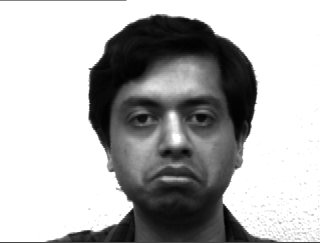

In [ ]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
imagem_np

In [ ]:
previsao = lbph_face_classifier.predict(imagem_np)
previsao

(10, 18.826269207670503)

In [ ]:
saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
saida_esperada

10

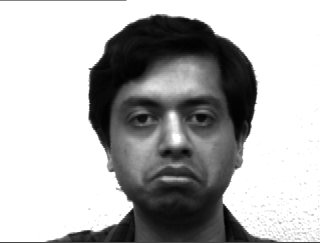

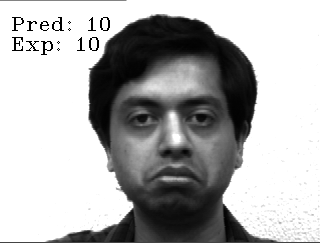

In [ ]:
cv2_imshow(imagem_np)
cv2.putText(imagem_np, 'Pred: ' + str(previsao[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2.putText(imagem_np, 'Exp: ' + str(saida_esperada), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2_imshow(imagem_np)

In [ ]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
previsaos = []
saidasEsp = []
for path in paths:
  #print(path)
  imagem = Image.open(path).convert('L')
  imagem_np = np.array(imagem, 'uint8')
  previsao, _ = lbph_face_classifier.predict(imagem_np)
  saida_esperada = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
  previsaos.append(previsao)
  saidasEsp.append(saida_esperada)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(saidasEsp, previsaos)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(saidasEsp, previsaos)
cm


array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
import seaborn
seaborn.heatmap(cm, annot=True)

**Detecção de pontos faciais**


In [ ]:
import dlib

In [ ]:
detector_face = dlib.get_frontal_face_detector()
detector_pontos = dlib.shape_predictor('/content/drive/MyDrive/Colab Notebooks/Weights/shape_predictor_68_face_landmarks.dat')

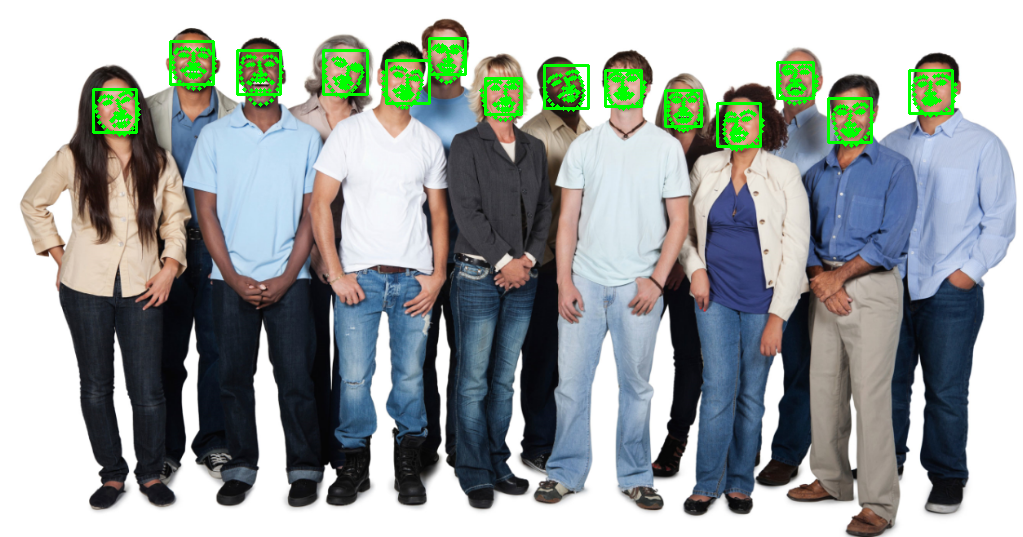

In [ ]:
imagem = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images/people2.jpg')
deteccoes = detector_face(imagem, 1)
for face in deteccoes:
  pontos = detector_pontos(imagem, face)
  for pontos in pontos.parts():
    cv2.circle(imagem, (pontos.x, pontos.y), 2, (0, 255, 0), -1)


  #print(pontos.parts())
  #print(len(pontos.parts()))
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(imagem, (l, t), (r, b), (0, 255, 0), 2)
cv2_imshow(imagem)

# **Detecção de descritores faciais**


In [ ]:
detector_face = dlib.get_frontal_face_detector()
detector_pontos =  dlib.shape_predictor('/content/drive/MyDrive/Colab Notebooks/Weights/shape_predictor_68_face_landmarks.dat')
descritor_facial_extractor = dlib.face_recognition_model_v1('/content/drive/MyDrive/Colab Notebooks/Weights/dlib_face_recognition_resnet_model_v1.dat')

In [ ]:
index = {}
idx = 0
descritores_faciais = None

paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
for path in paths:
  imagem = Image.open(path).convert('RGB')
  imagem_np = np.array(imagem, 'uint8')
  deteccoes = detector_face(imagem_np, 1)
  for face in deteccoes:
    l, r, t, b = face.left(), face.right(), face.top(), face.bottom()
    cv2.rectangle(imagem_np, (l, t), (r, b), (0, 255, 0), 2)

    pontos = detector_pontos(imagem_np, face)
    for ponto in pontos.parts():
      cv2.circle(imagem_np, (ponto.x, ponto.y), 2, (0, 255, 0), -1)

      descritor_facial = descritor_facial_extractor.compute_face_descriptor(imagem_np, pontos)
      print(type(descritor_facial))


  cv2_imshow(imagem_np)


# Calculo da distância entre faces

In [ ]:
len(index)

0

In [ ]:
np.linalg.norm(descritores_faciais[0] - descritores_faciais[1])